In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

In [6]:
with open('VDR_IC50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    vdr_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('cdd2021/data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [10:37:15] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [10:38:00] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [10:38:00] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [10:38:00] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [10:38:00] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:38:00] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [10:38:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:38:00] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [10:38:00] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [10:38:00] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [10:38:00] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit 

RDKit ERROR: [10:38:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12
RDKit ERROR: 
RDKit ERROR: [10:38:01] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [10:38:01] ERROR: Could not sanitize molecule ending on line 499305
RDKit ERROR: [10:38:01] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [10:38:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [10:38:01] ERROR: Could not sanitize molecule ending on line 503342
RDKit ERROR: [10:38:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [10:38:01] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:38:01] ERROR: Could not sanitize molecule ending on line 508068
RDKit ERROR: [10:38:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:38:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 

In [4]:
molecule = Chem.MolFromSmiles("CCO")
fp = Chem.GetMorganFingerprintAsBitVect(molecule, 2, nBits=1024)
# 2 for radius, 1024 for hashed bit vector length
fp

In [5]:
fp.ToBitString()

'000000000000000000000000000000000100000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [7]:
vdr_ligands_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)
                     for m in vdr_ligands]
# you do your ligand set :)
drugs_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugs]

In [8]:
vdr_ligands_ecfp_sums = [0]*vdr_ligands_ecfp[0].GetNumBits() # a list of zeros of a given length
for key in vdr_ligands_ecfp:
    for onbit in key.GetOnBits():
        vdr_ligands_ecfp_sums[onbit] += 1
vdr_ligands_ecfp_sums

[0,
 450,
 9,
 60,
 253,
 27,
 2,
 10,
 332,
 1,
 11,
 3,
 8,
 37,
 29,
 63,
 2,
 13,
 0,
 12,
 1,
 51,
 1,
 82,
 0,
 19,
 86,
 2,
 18,
 97,
 10,
 81,
 3,
 638,
 36,
 229,
 299,
 0,
 0,
 6,
 2,
 14,
 54,
 2,
 6,
 26,
 32,
 2,
 0,
 3,
 1,
 13,
 1,
 16,
 3,
 0,
 167,
 0,
 62,
 2,
 0,
 0,
 9,
 5,
 384,
 30,
 15,
 6,
 8,
 6,
 3,
 24,
 17,
 8,
 6,
 35,
 1,
 2,
 0,
 11,
 510,
 0,
 0,
 2,
 1,
 0,
 3,
 66,
 4,
 21,
 153,
 0,
 73,
 0,
 39,
 0,
 0,
 1,
 242,
 0,
 1,
 2,
 44,
 40,
 6,
 23,
 54,
 3,
 6,
 0,
 4,
 6,
 40,
 1,
 124,
 37,
 5,
 17,
 190,
 125,
 1,
 55,
 1,
 15,
 5,
 145,
 11,
 0,
 270,
 0,
 45,
 11,
 0,
 243,
 7,
 0,
 34,
 238,
 272,
 43,
 14,
 7,
 64,
 0,
 32,
 41,
 11,
 41,
 0,
 1,
 12,
 9,
 0,
 5,
 0,
 66,
 0,
 8,
 0,
 8,
 11,
 2,
 6,
 5,
 61,
 2,
 19,
 20,
 121,
 8,
 74,
 101,
 6,
 2,
 31,
 246,
 2,
 5,
 0,
 6,
 0,
 42,
 1,
 0,
 2,
 1,
 14,
 0,
 1,
 0,
 0,
 86,
 0,
 2,
 11,
 15,
 0,
 115,
 36,
 0,
 15,
 4,
 37,
 8,
 2,
 0,
 245,
 2,
 11,
 3,
 3,
 81,
 47,
 4,
 47,
 0,
 53,
 1,
 21,

In [9]:
drugs_ecfp_sums = [0]*drugs_ecfp[0].GetNumBits() # a list of zeros of a given length
for key in drugs_ecfp:
    for onbit in key.GetOnBits():
        drugs_ecfp_sums[onbit] += 1
drugs_ecfp_sums

[120,
 2360,
 285,
 317,
 939,
 231,
 29,
 138,
 213,
 303,
 260,
 258,
 68,
 665,
 227,
 828,
 103,
 104,
 93,
 187,
 118,
 203,
 63,
 237,
 153,
 162,
 127,
 111,
 62,
 211,
 69,
 172,
 158,
 4264,
 155,
 110,
 1076,
 73,
 87,
 207,
 79,
 440,
 648,
 112,
 79,
 261,
 319,
 76,
 52,
 97,
 89,
 123,
 245,
 271,
 100,
 63,
 105,
 85,
 158,
 178,
 69,
 179,
 204,
 219,
 2683,
 147,
 55,
 173,
 97,
 226,
 76,
 346,
 179,
 388,
 255,
 465,
 76,
 283,
 134,
 479,
 4939,
 169,
 152,
 122,
 313,
 87,
 270,
 124,
 108,
 105,
 1541,
 90,
 160,
 54,
 308,
 97,
 114,
 158,
 96,
 87,
 61,
 119,
 402,
 60,
 194,
 160,
 246,
 79,
 173,
 84,
 162,
 73,
 534,
 56,
 797,
 155,
 395,
 608,
 349,
 767,
 78,
 767,
 117,
 165,
 82,
 193,
 109,
 47,
 2503,
 89,
 337,
 123,
 98,
 162,
 127,
 52,
 625,
 56,
 515,
 399,
 667,
 59,
 125,
 150,
 289,
 198,
 99,
 2457,
 86,
 79,
 106,
 104,
 370,
 64,
 67,
 126,
 66,
 183,
 282,
 48,
 160,
 45,
 232,
 135,
 134,
 262,
 107,
 98,
 73,
 96,
 129,
 261,
 137,
 202,


In [10]:
vdr_ligands_ecfp_scaled = [x/len(vdr_ligands_ecfp) for x in vdr_ligands_ecfp_sums]
drugs_ecfp_scaled = [x/len(drugs_ecfp) for x in drugs_ecfp_sums]
drugs_ecfp_scaled

[0.01687051876845213,
 0.3317868691128919,
 0.04006748207507381,
 0.044566287079994375,
 0.13201180936313792,
 0.03247574862927035,
 0.004077042035709265,
 0.01940109658371995,
 0.029945170814002532,
 0.04259805989034163,
 0.036552790664979615,
 0.036271615352172076,
 0.009559960635456208,
 0.09349079150850555,
 0.03191339800365528,
 0.1164065795023197,
 0.014480528609588077,
 0.014621116265991847,
 0.013074652045550401,
 0.026289891747504568,
 0.016589343455644594,
 0.028539294249964854,
 0.008857022353437369,
 0.03331927456769296,
 0.021509911429776464,
 0.022775200337410376,
 0.017854632363278503,
 0.01560522986081822,
 0.008716434697033601,
 0.029663995501194994,
 0.009700548291859975,
 0.024181076901448054,
 0.022212849711795303,
 0.5994657669056657,
 0.021791086742584002,
 0.015464642204414453,
 0.1512723182904541,
 0.010262898917475045,
 0.012231126107127795,
 0.029101644875579924,
 0.011106424855897652,
 0.06185856881765781,
 0.0911008013496415,
 0.015745817517221986,
 0.011106

In [11]:
vdr_drugbank_differences = [(i, a_b[0] - a_b[1])
                             for i, a_b in enumerate(zip(vdr_ligands_ecfp_scaled, drugs_ecfp_scaled))]
# let's sort the bits by the difference in MACCS incidence between our ligand set and the DrugBank database
vdr_drugbank_differences.sort(key=lambda x: x[1])
vdr_drugbank_differences[:3], vdr_drugbank_differences[-3:]

([(147, -0.2816602636969656),
  (378, -0.14316655439332052),
  (820, -0.14252964639471372)],
 [(8, 0.4863845336961063),
  (753, 0.4960050585319107),
  (478, 0.5061105342571451)])

nejcastejsi bit je 478 ve srovnani s Drugbank

In [12]:
bitinfo = {} # dict to store infor about what bits were set by what atoms
ethanol = Chem.MolFromSmiles("CCO")
fp = Chem.GetMorganFingerprintAsBitVect(ethanol, 2, nBits=1024, bitInfo=bitinfo)
list(fp.GetOnBits()), bitinfo

([33, 80, 222, 294, 386, 807],
 {33: ((0, 0),),
  80: ((1, 0),),
  222: ((2, 1),),
  294: ((0, 1),),
  386: ((1, 1),),
  807: ((2, 0),)})

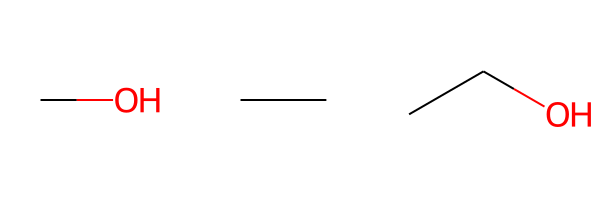

In [13]:
submols = []
for bit, atom_radius in bitinfo.items():
    atom, radius = atom_radius[0]
    if radius == 0: # radius 0 means just the atom, not useful as path
        continue
    hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(ethanol, radius, atom)
    submols.append(Chem.PathToSubmol(ethanol, hit_atoms))
Draw.MolsToGridImage(submols)

In [14]:
def substructures_of_bit_ecfp4_1024(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo=bitinfo)
    submols = [Chem.PathToSubmol(mol, hit_atoms) for atom, radius in bitinfo.get(bit, [])]
    return submols

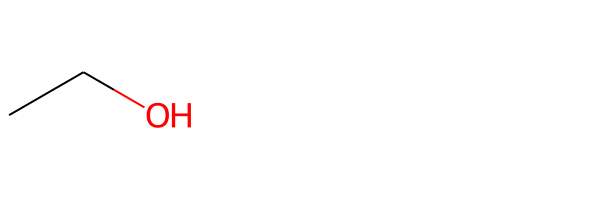

In [15]:
Draw.MolsToGridImage(substructures_of_bit_ecfp4_1024(ethanol, 386))

In [19]:
substructure_smiles = {}
for ligand in vdr_ligands:
    for submol in substructures_of_bit_ecfp4_1024(ligand, 478):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'C=CC': 245, 'CNC': 31, 'CCC': 32, 'C[SH]=O': 44, 'CCO': 2, 'ccC': 4}

In [20]:
substructure_smiles_db = {}
for drug in drugs:
    for submol in substructures_of_bit_ecfp4_1024(drug, 478):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles_db[subsmiles] = substructure_smiles_db.get(subsmiles, 0) + 1
substructure_smiles_db

{'CCN': 8,
 'CCC': 31,
 'CC.CO': 4,
 'CCS': 1,
 'C=CN': 1,
 'CO.CO': 4,
 'cCl.ns': 1,
 'csc': 1,
 'Ccn': 1,
 'CNC': 10,
 'C=O.C=O': 4,
 'C=CC': 1,
 'cOC': 2,
 'CC.CC': 6,
 'COC': 8,
 'cSc': 1,
 'cF.cF': 1,
 'cCc': 2,
 'c=O.cCl': 1,
 'CCO': 14,
 'ncN': 4,
 'CC[NH3+]': 1,
 'cnc': 4,
 'CSS': 8,
 'cnC': 1,
 'C[NH2+]C': 1,
 'NC=O': 7,
 'ccC': 2,
 'ccc': 6,
 'N=CN': 2,
 'O=[SH]O': 1,
 'C=C.CC': 1,
 'OPO': 1,
 'ncn': 6,
 'nc[nH]': 1,
 'c-cn': 1,
 'ccO': 1,
 'CCCl': 1,
 'CCc': 1,
 'cCC': 1,
 'O=S=O': 1,
 'C[SH]=O': 1,
 'C=O.CC': 1,
 'O=CO': 1,
 'CC.cc': 1,
 'coc': 1}